In [ ]:
# Highight the dates when return touches 2SD for strong 1 SD for week signal. 
# list tthose dates 
# plot on graph 
# backtest the returns

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# download data

stock = 'ICICIBANK.NS'

data = yf.download(tickers=stock,interval='1d', period='5y')

[*********************100%%**********************]  1 of 1 completed


In [69]:
# find the dates with SD2

y = np.array(data['Adj Close'])
X = np.array(pd.to_datetime(data['Adj Close'].index).map(dt.datetime.toordinal))

intercept, slope = np.polynomial.polynomial.polyfit(X, y, deg =1)
regression_line = (slope * X + intercept)

std_dev = np.std(y - regression_line)
plus_2_std = regression_line + 2 * std_dev
minus_2_std = regression_line - 2 * std_dev
plus_1_std = regression_line + std_dev
minus_1_std = regression_line - std_dev

X = np.array(data.index)


In [81]:

info = pd.DataFrame()
info['Close'] = data['Adj Close']
info['+2SD'] = plus_2_std
info['-2SD'] = minus_2_std
info['+1SD'] = plus_1_std
info['-1SD'] = minus_1_std
info['-2SD.90'] = info['-2SD'].apply(lambda x: (x+x*0.07))
info['weak'] = np.where(info['Close'] < info['-1SD'], 'True', 'False')
info['strong'] = np.where(info['Close'] < info['-2SD.90'], 'True', 'False')
info['v_strong'] = np.where(info['Close'] < info['-2SD'], 'True', 'False')
info

,Close,+2SD,-2SD,+1SD,-1SD,-2SD.90,weak,strong,v_strong
Date,,,,,,,,,
2019-11-08,473.131134,471.948034,185.090335,400.233609,256.804760,198.046658,False,False,False
2019-11-11,480.235992,473.353137,186.495438,401.638713,258.209863,199.550119,False,False,False
2019-11-13,469.554443,474.289873,187.432174,402.575448,259.146599,200.552426,False,False,False
2019-11-14,482.024261,474.758241,187.900542,403.043816,259.614967,201.053580,False,False,False
2019-11-15,483.184326,475.226609,188.368910,403.512184,260.083334,201.554733,False,False,False
...,...,...,...,...,...,...,...,...,...
2024-11-04,1277.199951,1325.782611,1038.924912,1254.068186,1110.639337,1111.649656,False,False,False
2024-11-05,1296.699951,1326.250979,1039.393280,1254.536554,1111.107705,1112.150809,False,False,False
2024-11-06,1302.349976,1326.719347,1039.861648,1255.004922,1111.576072,1112.651963,False,False,False


In [111]:
out_dates = pd.DataFrame()
# out_dates['Close'] = info[info['Close'] < info['-2SD.90']]['Close'] # 2SD.90

out_dates['Close'] = info[info['Close'] < info['-1SD']]['Close'] # -1SD


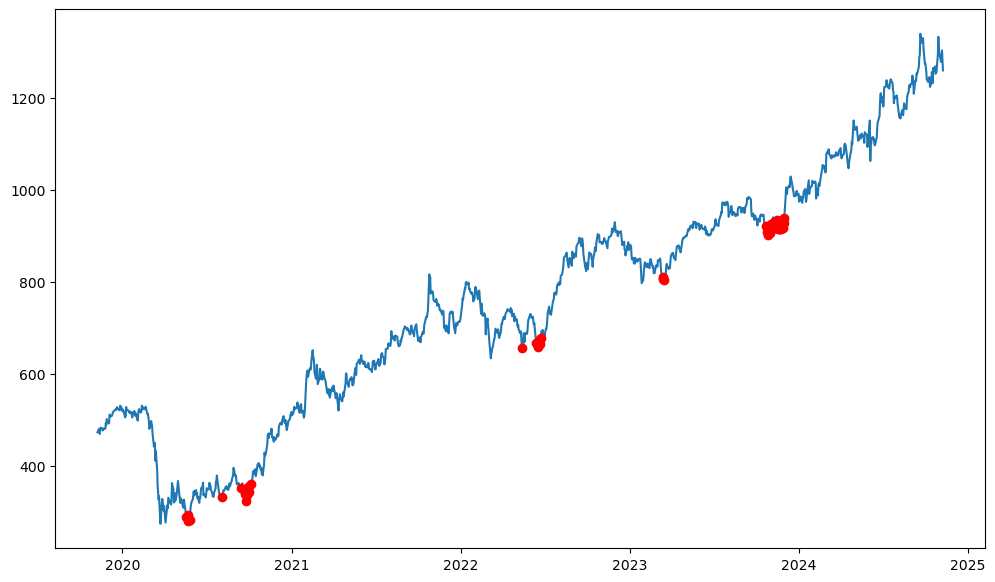

In [108]:
plt.figure(figsize=(12,7))
plt.plot(info['Close'])
plt.plot(out_dates['Close'], marker = 'o', color = 'r', linestyle = '');

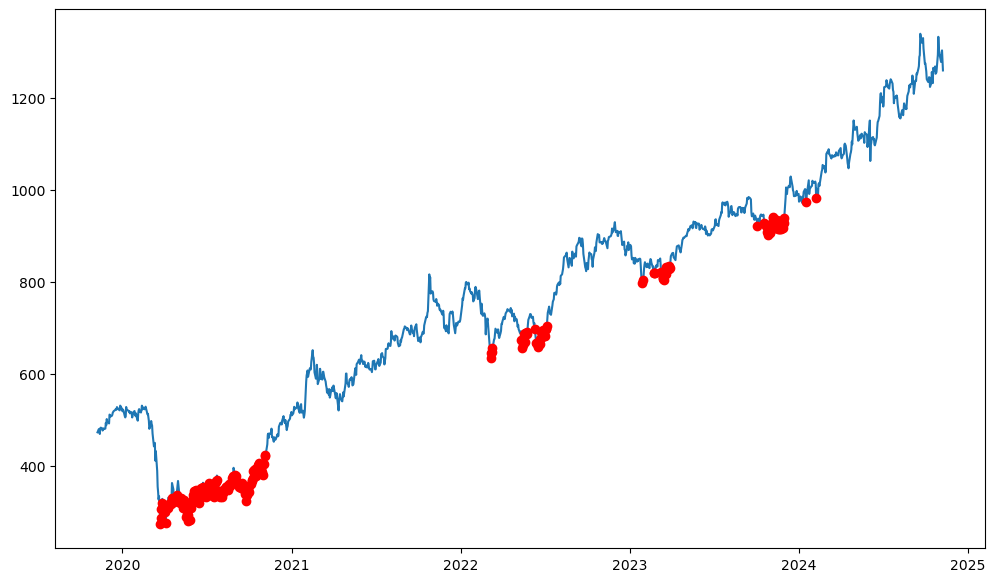

In [112]:
plt.figure(figsize=(12,7))
plt.plot(info['Close'])
plt.plot(out_dates['Close'], marker = 'o', color = 'r', linestyle = '');

In [113]:
# Return Analysis
stock = 'ICICIBANK.NS'

data = yf.download(tickers=stock,interval='1d', period='5y')

[*********************100%%**********************]  1 of 1 completed


In [219]:
# find the dates with SD2
weekly_data = pd.DataFrame()
weekly_data['week_return'] = data['Close'].resample('W', label='left').ffill().pct_change()*100
weekly_data['mean'] = weekly_data['week_return'].mean()
weekly_data['std'] = weekly_data['week_return'].std()
weekly_data['+1SD'] = weekly_data['mean'] + weekly_data['std']
weekly_data['-1SD'] = weekly_data['mean'] - weekly_data['std']
weekly_data['+2SD'] = weekly_data['mean'] + 2 * weekly_data['std']
weekly_data['-2SD'] = weekly_data['mean'] - 2*  weekly_data['std']
weekly_data['-2SD.90'] = weekly_data['-2SD'].apply(lambda x: (x-x*0.2))
weekly_data['weak'] = np.where(weekly_data['week_return'] < weekly_data['-1SD'], 1,0)
weekly_data['strong'] = np.where(weekly_data['week_return'] < weekly_data['-2SD.90'], 1,0)
weekly_data['v_strong'] = np.where(weekly_data['week_return'] < weekly_data['-2SD'], 1,0)
weekly_data

,week_return,mean,std,+1SD,-1SD,+2SD,-2SD,-2SD.90,weak,strong,v_strong
Date,,,,,,,,,,,
2019-11-10,NaN,0.458129,4.363128,4.821257,-3.904999,9.184385,-8.268127,-6.614501,0,0,0
2019-11-17,2.124833,0.458129,4.363128,4.821257,-3.904999,9.184385,-8.268127,-6.614501,0,0,0
2019-11-24,-0.610187,0.458129,4.363128,4.821257,-3.904999,9.184385,-8.268127,-6.614501,0,0,0
2019-12-01,3.180352,0.458129,4.363128,4.821257,-3.904999,9.184385,-8.268127,-6.614501,0,0,0
2019-12-08,2.380026,0.458129,4.363128,4.821257,-3.904999,9.184385,-8.268127,-6.614501,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-13,-1.351079,0.458129,4.363128,4.821257,-3.904999,9.184385,-8.268127,-6.614501,0,0,0
2024-10-20,3.393295,0.458129,4.363128,4.821257,-3.904999,9.184385,-8.268127,-6.614501,0,0,0
2024-10-27,-0.715702,0.458129,4.363128,4.821257,-3.904999,9.184385,-8.268127,-6.614501,0,0,0


In [220]:
data1 = data['Close'].resample('d').ffill()
# weak= weekly_data[weekly_data['weak'] ==1]
weak= weekly_data[weekly_data['strong'] ==1]
weak_df = pd.merge(weak, data1,left_index=True, right_index=True)

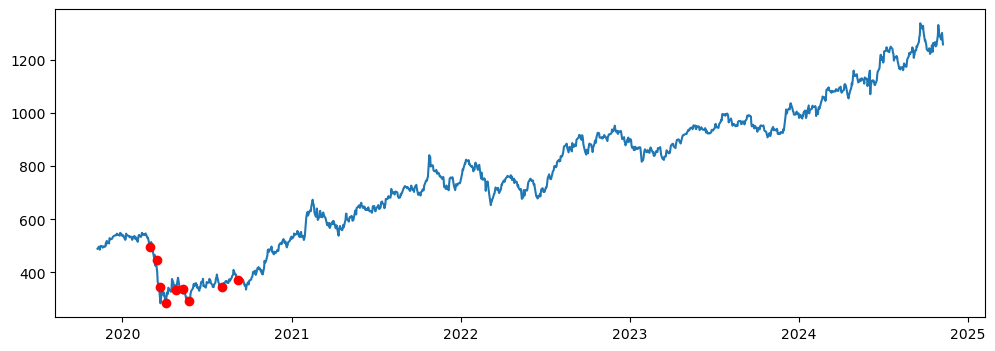

In [221]:
plt.figure(figsize=(12,4))
plt.plot(data['Close'])
plt.plot(weak_df['Close'], marker = 'o', color = 'r', linestyle = '');

In [222]:
data1 = data['Close'].resample('d').ffill()
weak= weekly_data[weekly_data['weak'] ==1]
# weak= weekly_data[weekly_data['strong'] ==1]
weak_df = pd.merge(weak, data1,left_index=True, right_index=True)

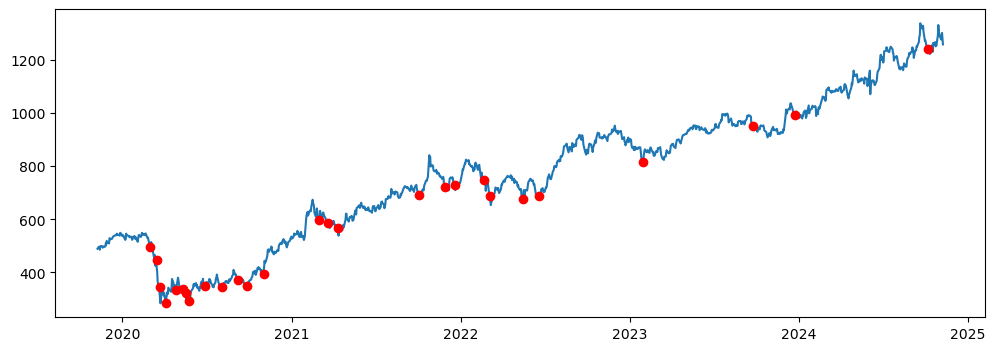

In [223]:
plt.figure(figsize=(12,4))
plt.plot(data['Close'])
plt.plot(weak_df['Close'], marker = 'o', color = 'r', linestyle = '');